In [95]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq
import matplotlib as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [53]:
!pip install biopython

# 1

In [54]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

def is defining the function get_sequences_from_file with the fasta file as an argument, it is importing fasta file that is inputed into the brackets
sequence_data_dict is making a dictionary
in the for loop, it is organizing the dictionary based on species_name from each data entry in the input file
the return is returning the dictionary organized by species_name and values (sequences)

# 2

In [55]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table) #to look at mito_table contents

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [56]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = '' 
    if len(seq)%3 == 0:                                                      
        for i in range(0, len(string_nucleotides), 3):
            codon = seq[i:i + 3]
    if codon in ["TAA", "TAG", "AGA", "AGG"]:                               
            return aa_seq_string
    aa_seq_string+= mito_table[codon]                                        
    return aa_seq_string

I got this code from https://www.geeksforgeeks.org/dna-protein-python-3/
aa_seq_string = '' is an empty string for the translated sequence
if len(seq)%3 == 0 is making codons from 3 nucleotides
for loop matches the stop codons to the ones in the table, checks the end of the codon for a stop codon
then we get the amino acid and add it to the string(aa_seq_string)

# 3

In [57]:
def translate(string_nucleotides):
    seq_string = Seq.translate(string_nucleotides, table=2, to_stop=True)
    return str(seq_string)

here I used the translate function from the Biopython library
table=2 is id=2 in the library which is "Vertebrate Mitochondrial"

# 4

In [58]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [59]:
def compute_molecular_weight(aa_seq):
    aa_analysis = ProteinAnalysis(aa_seq)
    molecular_weight = aa_analysis.molecular_weight()
    return molecular_weight

ProteinAnalysis is used store the output in the variable aa_analysis then I calculated the molecular weight for aa_analysis and the return output is the molecular weight

# 5

In [60]:
def gc_content(DNA_string):
    G_count = DNA_string.count("G")
    C_count = DNA_string.count("C")
    DNAstring_length = len(DNA_string)
    GC_content = (C_count+G_count)/DNAstring_length
    return  GC_content

G_count is the number of times G is found in the DNA_string input
C_count is the number of times C is found in the DNA_string input
DNAstring_length is the length of DNA_string input
GC_content has the calculation to get the GC content of the DNA_string input

In [61]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

In [62]:
penguins_df = pd.read_csv("penguins_mass.csv") 
species_list = list(penguins_df.species)

# 6 

In [63]:
cytb_seqs #checking if it was correctly imported

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

In [64]:
penguins_df #checking again

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [65]:
species_list #checking

['Aptenodytes forsteri',
 'Aptenodytes patagonicus',
 'Eudyptes chrysocome',
 'Eudyptes chrysolophus',
 'Eudyptes sclateri',
 'Eudyptula minor',
 'Pygoscelis adeliae',
 'Pygoscelis antarctica',
 'Pygoscelis papua',
 'Spheniscus demersus',
 'Spheniscus humboldti',
 'Spheniscus magellanicus']

In [66]:
penguins_df["Molecular Weight"]= penguins_df.shape [0]*["NaN"] #adding "Molecular Weight" column and values as NaN
penguins_df

,species,mass,Molecular Weight
0,Aptenodytes forsteri,28.00,NaN
1,Aptenodytes patagonicus,13.40,NaN
2,Eudyptes chrysocome,2.80,NaN
3,Eudyptes chrysolophus,4.50,NaN
4,Eudyptes sclateri,4.25,NaN
5,Eudyptula minor,1.60,NaN
6,Pygoscelis adeliae,4.60,NaN
7,Pygoscelis antarctica,4.10,NaN
8,Pygoscelis papua,6.10,NaN
9,Spheniscus demersus,3.20,NaN


In [67]:
penguins_df["GC content"]= penguins_df.shape [0]*["NaN"] #adding "GC content" column and values as NaN 
penguins_df

,species,mass,Molecular Weight,GC content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


# 7

In [69]:
Molecular_w_list = []
GC_content_list = []                   #start an empty list for molecular weight and GC content with []
for key, value in cytb_seqs.items():
    aa_seq = translate(value)          #using my translate function from part 3 to translate the DNA sequence
    mol_wt = compute_molecular_weight(str(aa_seq)) #using my function from part 4 to compute the molecular weight 
    gc_perc = gc_content(value)*100    #here gc content is multiplied by 100 to get the gc content percentage
    Molecular_w_list.append(mol_wt)    #I'm appending the values of GC content and molecular weight to the previously defined lists
    GC_content_list.append(gc_perc)
penguins_df["Molecular Weight"] = Molecular_w_list #to replace NaN values in Molecular weight and GC content columns with the computed values
penguins_df["GC content"] = GC_content_list
print(penguins_df) #to view the table

                    species   mass  Molecular Weight  GC content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474


in the for loop, keys is the species and value is the sequence of each species

# 8

In [89]:
%matplotlib inline

<AxesSubplot:title={'center':'Mass of each species'}, xlabel='species'>

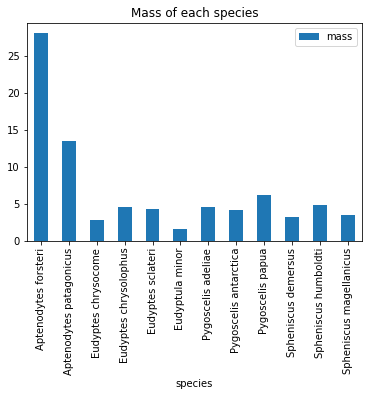

In [77]:
penguins_df.plot(kind='bar',x='species',y='mass', title='Mass of each species')

Q1: Eudyptula minor is the smallest penguin by mass
Q2: Geographical range: Coastlines of southern Australia and New Zealand from:https://www.wildlife.vic.gov.au/__data/assets/pdf_file/0023/91391/Little-Penguin.pdf

# 9 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


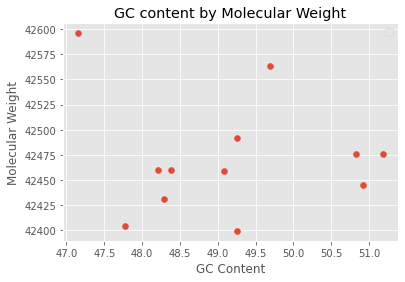

In [96]:
fig, ax =plt.subplots()         #plo
my_scatter_plot =ax.scatter(
penguins_df["GC content"],         #GC content from penguins dataframe
penguins_df["Molecular Weight"]    #Molecular Weight from penguins dataframe
)

plt.title('GC content by Molecular Weight')
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight')
plt.legend () #Added a title, labeled x and y axes

# 10

In [97]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False) #saving the new dataframe